# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow opencv-python matplotlib

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.4
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.0
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.1
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blis                             0.7.9


In [ ]:
#@title
import zipfile
import os

In [ ]:
#@title

!wget --no-check-certificate \
    "https://github.com/Ujjwal-wadhwa/data/archive/refs/heads/main.zip"


# zip_ref = zipfile.ZipFile('/tmp/cats-and-dogs.zip', 'r') #Opens the zip file in read mode
# zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
# zip_ref.close()

--2023-07-06 02:27:56--  https://github.com/Ujjwal-wadhwa/data/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Ujjwal-wadhwa/data/zip/refs/heads/main [following]
--2023-07-06 02:27:57--  https://codeload.github.com/Ujjwal-wadhwa/data/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [            <=>     ]   1.15G  18.2MB/s    in 63s     

2023-07-06 02:29:00 (18.8 MB/s) - ‘main.zip’ saved [1239104911]



In [ ]:
#@title
!unzip main.zip

Archive:  main.zip
8382f7d993a2efc8c9979d06f5d36b183e68f5cc
   creating: data-main/
   creating: data-main/FIDAC_2.0/
   creating: data-main/FIDAC_2.0/FIDAC_1.0/
   creating: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/
  inflating: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_0.jpg  
  inflating: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_10.jpg  
  inflating: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_100.jpg  
 extracting: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_1000.jpg  
  inflating: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_1004.jpg  
 extracting: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_1006.jpg  
  inflating: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_1007.jpg  
  inflating: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_101.jpg  
 extracting: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_1014.jpg  
 extracting: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDA

In [ ]:
import tensorflow as tf
import os
import random

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove images with wrong extensions and corrupted images




In [ ]:
import cv2
import imghdr
import matplotlib.pyplot as plt


In [ ]:
data_dir = '/content/data-main/FIDAC_2.0/FIDAC_1.0'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

NameError: ignored

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
rmdir /content/data-main/FIDAC_2.0/FIDAC_1.0/.ipynb_checkpoints


In [ ]:
for image_class in os.listdir(data_dir):
  print(image_class)

Authentic_Images
Tampered_Images


In [ ]:
import os
import random
import shutil

# Set the paths to your original dataset
authentic_dir = '/content/data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images'
tampered_dir = '/content/data-main/FIDAC_2.0/FIDAC_1.0/Tampered_Images'

# Create a new directory to store the balanced dataset
balanced_dir = '/content/data-main/FIDAC_2.0/balanced'
os.makedirs(balanced_dir, exist_ok=True)

# Create separate class folders inside the balanced directory
balanced_authentic_dir = os.path.join(balanced_dir, 'authentic')
balanced_tampered_dir = os.path.join(balanced_dir, 'tampered')
os.makedirs(balanced_authentic_dir, exist_ok=True)
os.makedirs(balanced_tampered_dir, exist_ok=True)

# Count the number of images in each class
authentic_images = os.listdir(authentic_dir)
tampered_images = os.listdir(tampered_dir)
authentic_count = len(authentic_images)
tampered_count = len(tampered_images)

# Calculate the oversampling ratio
oversampling_ratio = authentic_count // tampered_count

# Oversample the tampered images
for root, dirs, files in os.walk(tampered_dir):
    for file in files:
        image_path = os.path.join(root, file)
        shutil.copy(image_path, balanced_tampered_dir)

        # Perform oversampling
        for _ in range(oversampling_ratio - 1):
            new_filename = f"oversampled_{random.randint(1, 100000)}.jpg"
            new_image_path = os.path.join(balanced_tampered_dir, new_filename)
            shutil.copy(image_path, new_image_path)

# Undersample the authentic images
for root, dirs, files in os.walk(authentic_dir):
    random.shuffle(files)
    undersampled_files = files[:tampered_count]
    for file in undersampled_files:
        image_path = os.path.join(root, file)
        shutil.copy(image_path, balanced_authentic_dir)



# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/data-main/FIDAC_2.0/balanced')

Found 1049 files belonging to 3 classes.


In [ ]:
balanced_dir = '/content/data-main/FIDAC_2.0/balanced'

In [ ]:
for image_class in os.listdir(balanced_dir):
  print(image_class)

.ipynb_checkpoints
tampered
authentic


In [ ]:
rmdir /content/data-main/FIDAC_2.0/balanced/.ipynb_checkpoints

In [ ]:
for image_class in os.listdir(balanced_dir):
  print(image_class)

tampered
authentic


In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/data-main/FIDAC_2.0/balanced')

Found 1049 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

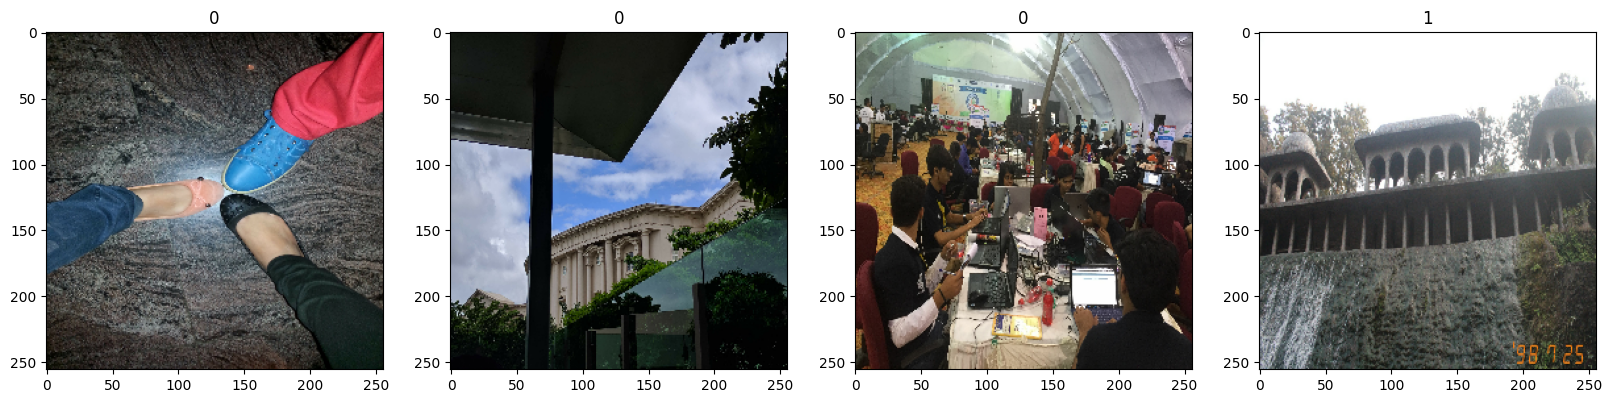

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
class_names = ['authentic', 'tampered']

# Iterate over the labels and print the class association
for label in batch[1]:
    class_association = class_names[label]
    print(class_association)

authentic
authentic
authentic
tampered
authentic
tampered
tampered
tampered
tampered
authentic
authentic
authentic
authentic
tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered


so, basically authentic has been assigned 0 and tampered has been assigned 1.


# 4. Scale Data

In [ ]:
batch[0].max()

255.0

In [ ]:
data.as_numpy_iterator().next()

(array([[[[ 24.371094 ,   9.371094 ,   6.3710938],
          [ 35.3125   ,  16.3125   ,   9.449219 ],
          [ 39.003906 ,  24.410156 ,  21.410156 ],
          ...,
          [141.94922  , 148.32422  , 144.19922  ],
          [146.89453  , 147.89453  , 139.89453  ],
          [156.92969  , 147.92969  , 140.92969  ]],
 
         [[ 24.175781 ,   6.1757812,   2.1757812],
          [ 32.6875   ,  14.6875   ,  10.6875   ],
          [ 30.292969 ,  13.105469 ,  11.917969 ],
          ...,
          [125.421875 , 128.42188  , 121.421875 ],
          [123.796875 , 120.796875 , 115.796875 ],
          [129.69531  , 126.69531  , 117.69531  ]],
 
         [[ 28.632812 ,   7.1757812,   4.2695312],
          [ 35.695312 ,  16.261719 ,  13.386719 ],
          [ 30.246094 ,  11.6171875,   7.6171875],
          ...,
          [ 84.3125   ,  80.5625   ,  75.1875   ],
          [ 85.05078  ,  78.05078  ,  72.05078  ],
          [ 81.39453  ,  72.64453  ,  71.01953  ]],
 
         ...,
 
         [[ 

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.37189797, 0.28562346, 0.23399204],
          [0.34120712, 0.272572  , 0.22941943],
          [0.33658853, 0.30129442, 0.18756893],
          ...,
          [0.4765089 , 0.3745481 , 0.37062654],
          [0.5293965 , 0.43920037, 0.41567096],
          [0.55818015, 0.4640625 , 0.42484683]],
 
         [[0.36405483, 0.33398438, 0.24313726],
          [0.29410234, 0.23920037, 0.19606312],
          [0.31239277, 0.24313726, 0.18756893],
          ...,
          [0.48619792, 0.3881587 , 0.36070773],
          [0.54901963, 0.45882353, 0.43135723],
          [0.5477022 , 0.44574142, 0.44836092]],
 
         [[0.31175706, 0.29607078, 0.19803156],
          [0.31769302, 0.27653953, 0.21576287],
          [0.30913755, 0.25223652, 0.20976563],
          ...,
          [0.5300781 , 0.43988204, 0.41635263],
          [0.55492496, 0.4549326 , 0.4451057 ],
          [0.54967064, 0.42418045, 0.4437883 ]],
 
         ...,
 
         [[0.19672947, 0.16535692, 0.12091759],
          [0.19806

# 5. Split Data

In [ ]:
len(data)

33

In [ ]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [ ]:
test_size

6

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import layers, models

In [ ]:
#@title
model = Sequential()

In [ ]:
#@title
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))#here this is a 2d convulation layer which performs the image processing. 16 is the number of filders ; 3,3 is the siz of the input sample and 1 is the stride
model.add(MaxPooling2D())# It only selects the most prominent features.
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())#converts output of convulution layer to a single vector which can be used as input for dense layer
model.add(Dense(256, activation='relu'))#It is deeply connected to the previous layer. it recieves input from every neuron of previous layer and perform matrix multiplication.
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#@title
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
#@title
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

6.5 SECOND APPROACH OF MODEL BUILING

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [ ]:
random.seed(0)
model = models.Sequential()
# model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1))

In [ ]:
lr = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#@title
epochs=30
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs,
  verbose=1
)

# 7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback],verbose = 1)

Epoch 1/30
19/19 [==============================] - 138s 6s/step - loss: 1.9124 - accuracy: 0.5674 - val_loss: 1.8963 - val_accuracy: 0.3594
Epoch 2/30
19/19 [==============================] - 81s 4s/step - loss: 1.8052 - accuracy: 0.5641 - val_loss: 1.8082 - val_accuracy: 0.3542
Epoch 3/30
19/19 [==============================] - 81s 4s/step - loss: 1.7312 - accuracy: 0.5477 - val_loss: 1.7463 - val_accuracy: 0.4688
Epoch 4/30
19/19 [==============================] - 82s 4s/step - loss: 1.6611 - accuracy: 0.5954 - val_loss: 1.6598 - val_accuracy: 0.3698
Epoch 5/30
19/19 [==============================] - 80s 4s/step - loss: 1.6074 - accuracy: 0.6003 - val_loss: 1.6144 - val_accuracy: 0.3802
Epoch 6/30
19/19 [==============================] - 82s 4s/step - loss: 1.5583 - accuracy: 0.5280 - val_loss: 1.5536 - val_accuracy: 0.3906
Epoch 7/30
19/19 [==============================] - 80s 4s/step - loss: 1.4809 - accuracy: 0.6266 - val_loss: 1.5122 - val_accuracy: 0.3854
Epoch 8/30
19/19 [=

# 8. Plot Performance

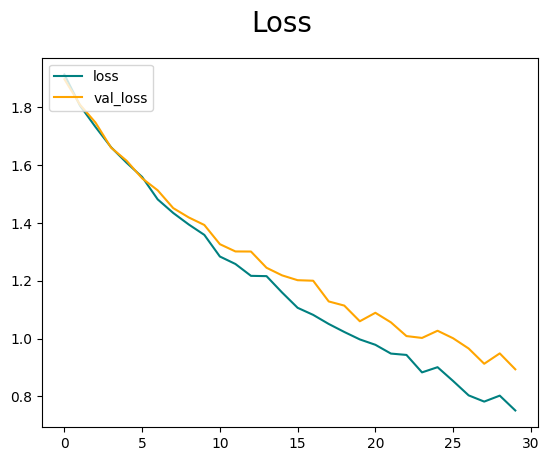

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

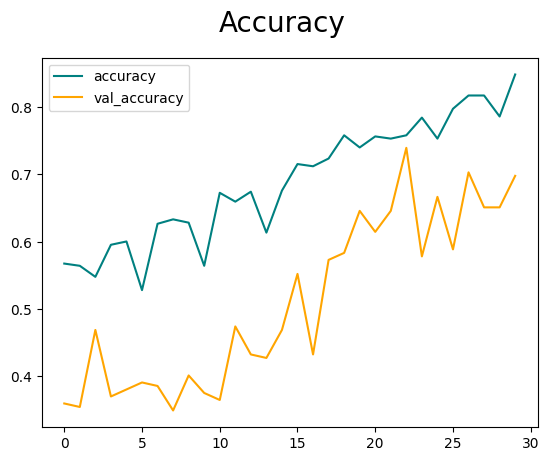

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 48ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.7291667, shape=(), dtype=float32) tf.Tensor(0.61403507, shape=(), dtype=float32) tf.Tensor(0.6354167, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

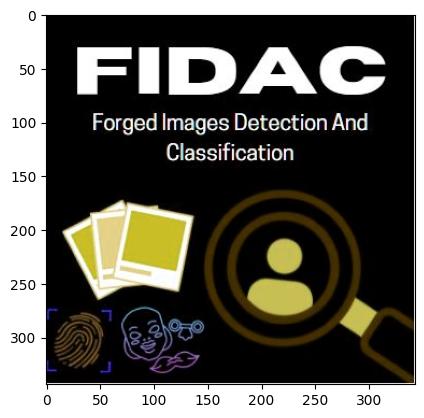

In [ ]:
img = cv2.imread('/content/FIDAC.JPG')
plt.imshow(img)
plt.show()

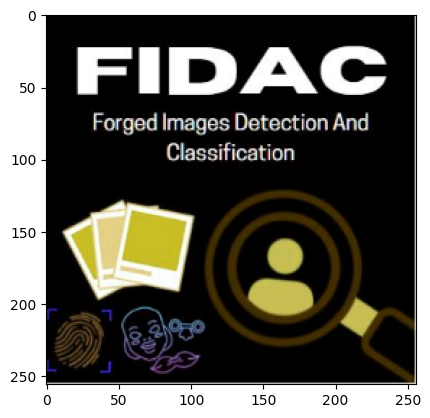

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize


<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[192.46875  , 192.46875  , 192.46875  ],
        [192.46875  , 192.46875  , 192.46875  ],
        [192.46875  , 192.46875  , 192.46875  ],
        ...,
        [194.82858  , 192.82858  , 192.00046  ],
        [195.45782  , 193.45782  , 192.54544  ],
        [228.9574   , 226.9574   , 225.9574   ]],

       [[  0.96875  ,   0.96875  ,   0.96875  ],
        [  0.96875  ,   0.96875  ,   0.96875  ],
        [  0.96875  ,   0.96875  ,   0.96875  ],
        ...,
        [  6.9739685,   4.9739685,   4.4583435],
        [  5.137726 ,   3.1377258,   2.6374207],
        [194.71826  , 192.71826  , 191.80588  ]],

       [[  0.       ,   0.       ,   0.       ],
        [  0.       ,   0.       ,   0.       ],
        [  0.       ,   0.       ,   0.       ],
        ...,
        [  3.7442627,   1.7442627,   1.4743958],
        [  4.3002014,   2.3002014,   1.3691406],
        [201.13467  , 199.13467  , 198.15857  ]],

       ...,

     

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [ ]:
yhat

array([[2.5717196]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is tampered')
else:
    print(f'Predicted class is Authentic')

Predicted class is tampered


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclass.h5'))

In [ ]:
new_model = load_model('/content/models/imageclass.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 97ms/step


array([[0.25591943]], dtype=float32)